# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Create endpoint URL with each city
city_url =f"{url}&q={city}&appid={weather_api_key}&units={units}" 
    
# Parse the JSON and retrieve data
city_weather = requests.get(city_url).json()   
pprint(city_weather)  

{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': 44.1833, 'lon': 28.65},
 'dt': 1706848117,
 'id': 680963,
 'main': {'feels_like': -6.09,
          'grnd_level': 1016,
          'humidity': 70,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': -0.62,
          'temp_max': -0.62,
          'temp_min': -0.72},
 'name': 'Constanța',
 'sys': {'country': 'RO',
         'id': 6912,
         'sunrise': 1706851382,
         'sunset': 1706886894,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 333, 'gust': 9.57, 'speed': 5.71}}


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units={units}" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"]  
        city_max_temp = city_weather["main"]["temp_max"]  # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]  # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]  # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aykol
City not found. Skipping...
Processing Record 2 of Set 1 | jinjiang
Processing Record 3 of Set 1 | maceio
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | chegdomyn
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | castillos
Processing Record 11 of Set 1 | rohru
Processing Record 12 of Set 1 | smithers
Processing Record 13 of Set 1 | serdar
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | lucapa
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | malvan
Processing Record 20 of Set 1 | vorkuta
Processing Record 21 of Set 1 | coari
Processing Record 22 of Set 

Processing Record 41 of Set 4 | daru
Processing Record 42 of Set 4 | benjamin constant
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | pangkalanbuun
Processing Record 45 of Set 4 | viedma
Processing Record 46 of Set 4 | estancia
Processing Record 47 of Set 4 | nanpiao
Processing Record 48 of Set 4 | la passe
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | springs
Processing Record 1 of Set 5 | atafu village
Processing Record 2 of Set 5 | ayora
Processing Record 3 of Set 5 | eraan
Processing Record 4 of Set 5 | yantongshan
Processing Record 5 of Set 5 | san rafael
Processing Record 6 of Set 5 | utrik
Processing Record 7 of Set 5 | vorgashor
Processing Record 8 of Set 5 | puerto baquerizo moreno
Processing Record 9 of Set 5 | inarajan village
Processing Record 10 of Set 5 | new plymouth
Processing Record 11 of Set 5 | flin flon
Processing Record 12 of Set 5 | kailua-kona
Processing Record 13 of Set 5 | wailua homesteads
Processing Rec

Processing Record 33 of Set 8 | arkhangel'sk
Processing Record 34 of Set 8 | rizokarpaso
Processing Record 35 of Set 8 | meulaboh
Processing Record 36 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 37 of Set 8 | youhao
Processing Record 38 of Set 8 | coxen hole
Processing Record 39 of Set 8 | mar del plata
Processing Record 40 of Set 8 | sijunjung
Processing Record 41 of Set 8 | al bawiti
Processing Record 42 of Set 8 | callao
Processing Record 43 of Set 8 | rafsanjan
Processing Record 44 of Set 8 | torbeyevo
Processing Record 45 of Set 8 | kourou
Processing Record 46 of Set 8 | havsa
Processing Record 47 of Set 8 | chernyshevsk
Processing Record 48 of Set 8 | pokhara
Processing Record 49 of Set 8 | tay ninh
Processing Record 0 of Set 9 | mumbai
Processing Record 1 of Set 9 | wewak
Processing Record 2 of Set 9 | george town
Processing Record 3 of Set 9 | pemba
Processing Record 4 of Set 9 | shitanjing
Processing Record 5 of Set 9 | port alberni
Processing Record 6 

Processing Record 25 of Set 12 | linqiong
Processing Record 26 of Set 12 | gaya
Processing Record 27 of Set 12 | port glaud
City not found. Skipping...
Processing Record 28 of Set 12 | kencong
Processing Record 29 of Set 12 | tlapa de comonfort
Processing Record 30 of Set 12 | sao jose da coroa grande
Processing Record 31 of Set 12 | bom jesus
Processing Record 32 of Set 12 | cidreira
Processing Record 33 of Set 12 | malango
Processing Record 34 of Set 12 | broome
Processing Record 35 of Set 12 | mahibadhoo
Processing Record 36 of Set 12 | pico truncado
Processing Record 37 of Set 12 | dubuque
Processing Record 38 of Set 12 | pathein
Processing Record 39 of Set 12 | gaoyou
Processing Record 40 of Set 12 | retreat
Processing Record 41 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 42 of Set 12 | egilsstadir
Processing Record 43 of Set 12 | quincy
Processing Record 44 of Set 12 | barra de santo antonio
-----------------------------
Data Retrieval Complete      
----

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jinjiang,24.8198,118.5741,16.68,74,100,6.33,CN,1706848121
1,maceio,-9.6658,-35.7353,25.69,94,75,1.54,BR,1706848121
2,port mathurin,-19.6833,63.4167,27.48,82,27,11.30,MU,1706848121
3,chegdomyn,51.1167,133.0167,-22.57,81,17,0.94,RU,1706848121
4,dudinka,69.4058,86.1778,-13.54,91,100,11.59,RU,1706848121


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jinjiang,24.8198,118.5741,16.68,74,100,6.33,CN,1706848121
1,maceio,-9.6658,-35.7353,25.69,94,75,1.54,BR,1706848121
2,port mathurin,-19.6833,63.4167,27.48,82,27,11.30,MU,1706848121
3,chegdomyn,51.1167,133.0167,-22.57,81,17,0.94,RU,1706848121
4,dudinka,69.4058,86.1778,-13.54,91,100,11.59,RU,1706848121


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

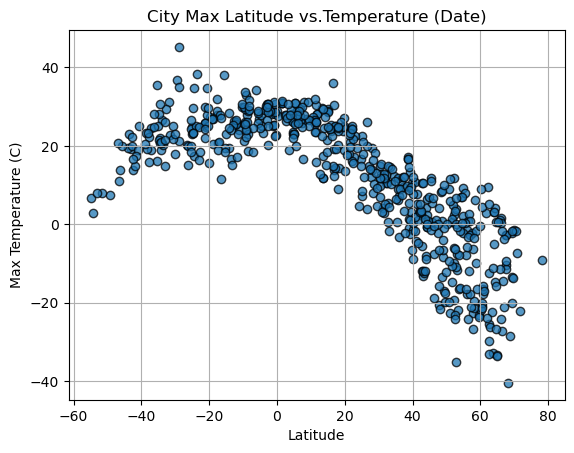

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)   

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

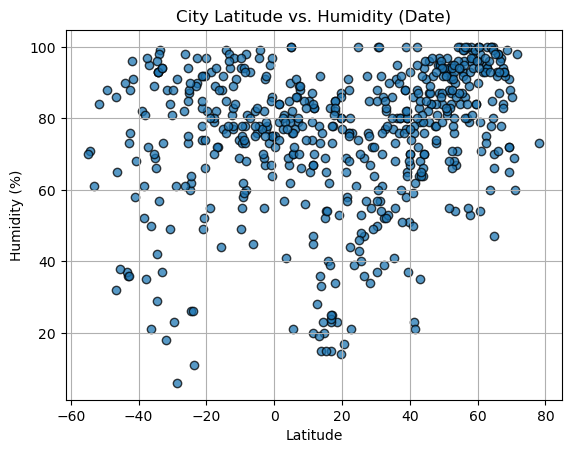

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)      

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

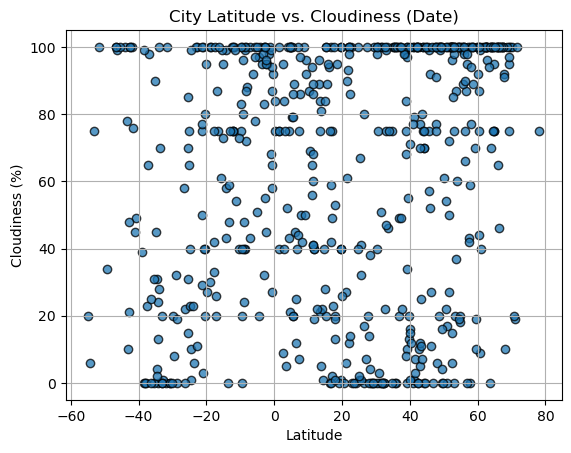

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

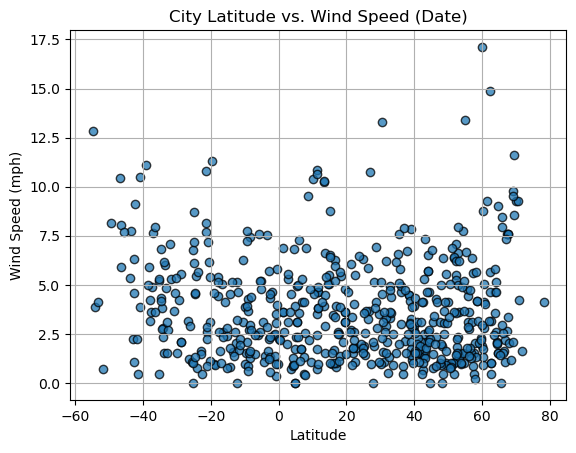

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)  

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = rvalue**2
    print(f"The r value is: {r_squared}")
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Linear Regression for {title}")
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]       

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jinjiang,24.8198,118.5741,16.68,74,100,6.33,CN,1706848121
3,chegdomyn,51.1167,133.0167,-22.57,81,17,0.94,RU,1706848121
4,dudinka,69.4058,86.1778,-13.54,91,100,11.59,RU,1706848121
8,rohru,31.2167,77.7500,4.21,57,0,1.07,IN,1706848123
9,smithers,54.7804,-127.1743,2.18,100,100,1.03,CA,1706847913


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,maceio,-9.6658,-35.7353,25.69,94,75,1.54,BR,1706848121
2,port mathurin,-19.6833,63.4167,27.48,82,27,11.30,MU,1706848121
5,blackmans bay,-43.0167,147.3167,19.29,36,10,2.24,AU,1706848121
6,adamstown,-25.0660,-130.1015,24.91,87,65,8.70,PN,1706847945
7,castillos,-34.1667,-53.8333,18.88,93,0,2.80,UY,1706848122


###  Temperature vs. Latitude Linear Regression Plot

The r value is: 0.7265404587401693


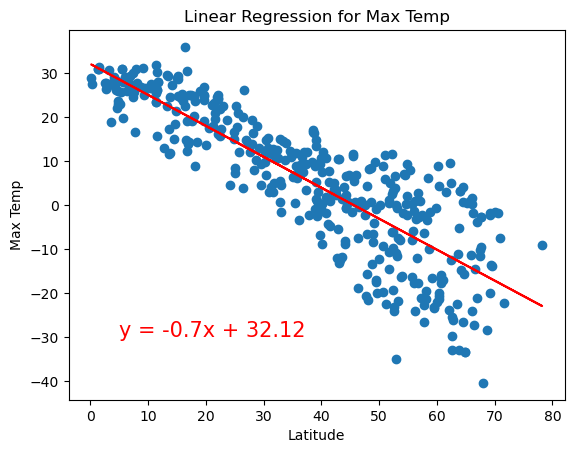

In [17]:
# Linear regression on Northern Hemisphere

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp",(5,-30))

The r value is: 0.23925752435066652


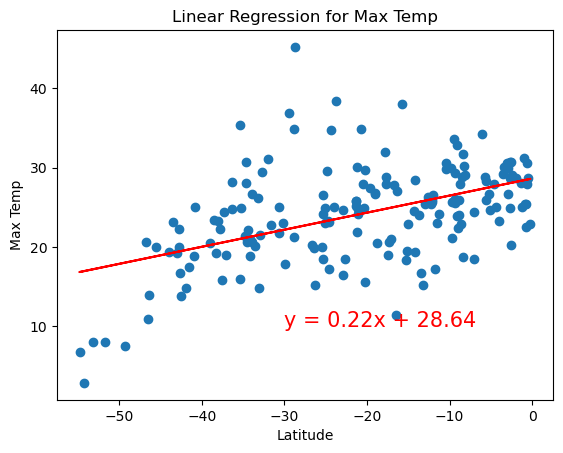

In [18]:
# Linear regression on Southern Hemisphere

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp",(-30,10))

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a negative correlation between latitude and maximum temperature. As latitude increases, the maximum temperature tends to decrease. This relationship means regions farther from the equator experiences cooler temperatures. On the other hand, in the Southern Hemisphere, there is a positive correlation between latitude and maximum temperature. As latitude increases, the maximum temperature tends to increase. This is because regions closer to the equator experience warmer temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.16707205561059343


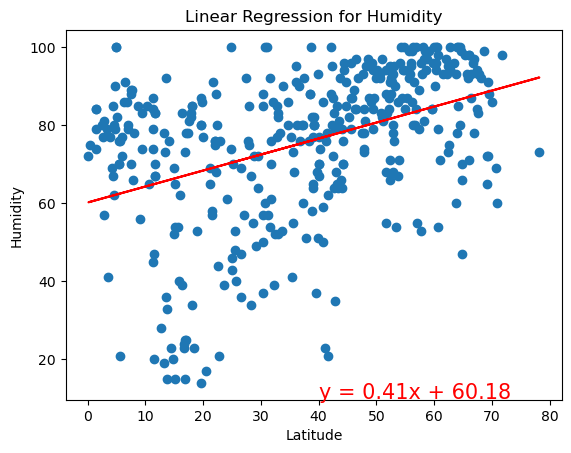

In [19]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity",(40,10))

The r value is: 0.047490873780428475


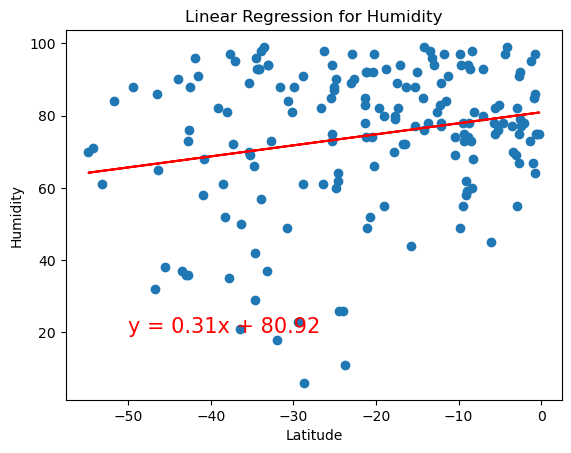

In [20]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity",(-50,20))

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there appears to be a very weak positive correlation between latitude and humidity. However, the correlation is not very strong,as the r values are closer to 0 indicating that latitude alone may not be a strong predictor of humidity in this hemisphere.
In the Southern Hemisphere, a very weak positive correlation between latitude and humidity is observed.Data points are widely scattered around the line indicating variability.  Again, this correlation is not particularly strong, suggesting that latitude alone may not be a dominant factor influencing humidity levels in this hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.04603607095909405


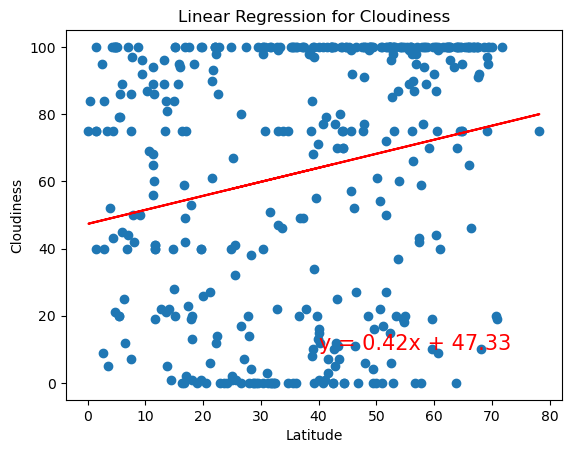

In [21]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness",(40,10))

The r value is: 0.10802182544602493


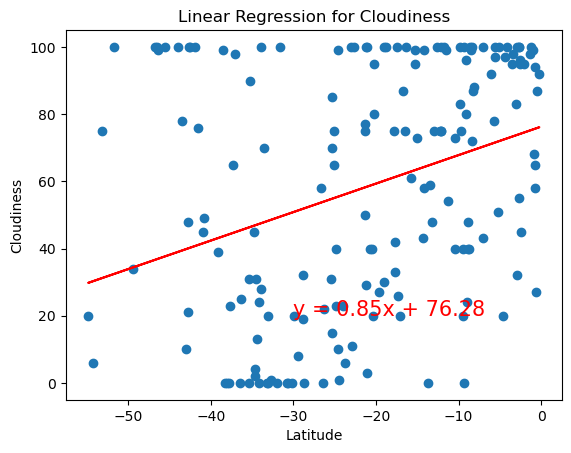

In [22]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness",(-30,20))

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there appears to be no strong correlation between latitude and cloudiness, indicating that latitude alone may not be a significant predictor of cloudiness in this hemisphere. 
In the Southern Hemisphere, a similar finding is observed. Again, this correlation is not particularly strong, suggesting that latitude alone may not be a dominant factor influencing cloudiness levels in this hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.002495604554972609


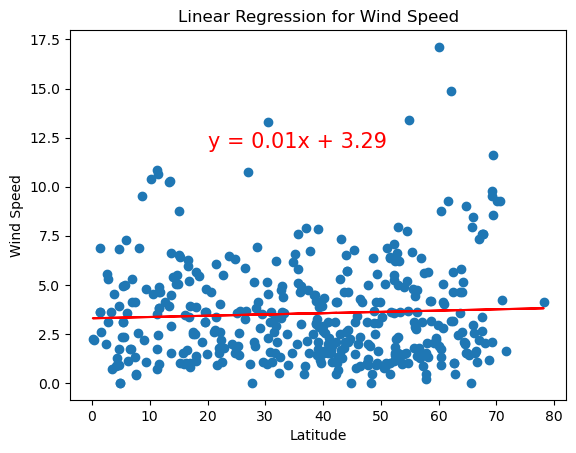

In [23]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed",(20,12))

The r value is: 0.11483826723468586


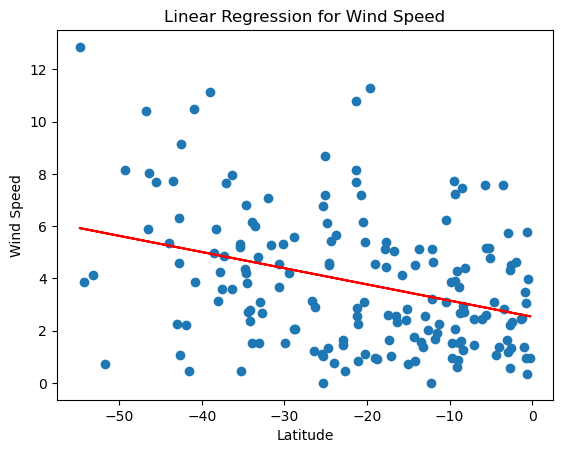

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed",(-30,14))

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemisphere, there appears to be a very weak or no correlation between latitude and wind speed with r values closer to 0.This indicates that latitude alone may not be a significant predictor of wind speed in both hemispheres. Other factors needs consideration.